In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
import json

# Load the JSON file
with open('D:\Advanced-training-Python-AIML\datasets/file.json', 'r') as f:
    data = json.load(f)

In [9]:
df=pd.read_json('D:\Advanced-training-Python-AIML\datasets/file.json')


In [19]:
df.columns

Index(['productId', 'productName', 'description', 'brand', 'category', 'price',
       'currency', 'stock', 'images', 'variants', 'dimensions', 'ratings',
       'reviews'],
      dtype='object')

In [11]:
df['stock']

0     {'available': True, 'quantity': 50}
1    {'available': True, 'quantity': 200}
2     {'available': True, 'quantity': 30}
3    {'available': True, 'quantity': 100}
4     {'available': True, 'quantity': 80}
Name: stock, dtype: object

In [12]:
df['variants']

0    [{'variantId': '1001_01', 'color': 'Black', 'p...
1    [{'variantId': '1002_01', 'color': 'Black', 'p...
2    [{'variantId': '1003_01', 'screenSize': '55 in...
3    [{'variantId': '1004_01', 'color': 'Red', 'pri...
4    [{'variantId': '1005_01', 'size': 'M', 'color'...
Name: variants, dtype: object

In [15]:
df_products = pd.json_normalize(data, sep='_')

In [20]:
df_products.head()
df_products.shape
df_products.columns

Index(['productId', 'productName', 'description', 'brand', 'category', 'price',
       'currency', 'images', 'variants', 'reviews', 'stock_available',
       'stock_quantity', 'dimensions_weight', 'dimensions_width',
       'dimensions_height', 'dimensions_depth', 'ratings_averageRating',
       'ratings_numberOfReviews'],
      dtype='object')

In [21]:
df['dimensions']

0    {'weight': '0.5kg', 'width': '18cm', 'height':...
1    {'weight': '0.2kg', 'width': '8cm', 'height': ...
2    {'weight': '15kg', 'width': '123cm', 'height':...
3    {'weight': '0.3kg', 'width': '15cm', 'height':...
4    {'weight': '1.5kg', 'width': '60cm', 'height':...
Name: dimensions, dtype: object

In [22]:
df_products.head()

,productId,productName,description,brand,category,price,currency,images,variants,reviews,stock_available,stock_quantity,dimensions_weight,dimensions_width,dimensions_height,dimensions_depth,ratings_averageRating,ratings_numberOfReviews
0,1001,Wireless Headphones,Noise-cancelling wireless headphones with Blue...,SoundPro,Electronics,199.99,USD,"[https://example.com/products/1001/main.jpg, h...","[{'variantId': '1001_01', 'color': 'Black', 'p...","[{'reviewId': 501, 'userId': 101, 'username': ...",True,50,0.5kg,18cm,20cm,8cm,4.7,120
1,1002,Smartphone Case,"Durable and shockproof case for smartphones, a...",CaseMate,Accessories,29.99,USD,"[https://example.com/products/1002/main.jpg, h...","[{'variantId': '1002_01', 'color': 'Black', 'p...","[{'reviewId': 601, 'userId': 103, 'username': ...",True,200,0.2kg,8cm,15cm,1cm,4.4,80
2,1003,4K Ultra HD Smart TV,55-inch 4K Ultra HD Smart TV with built-in Wi-...,Visionary,Electronics,799.99,USD,"[https://example.com/products/1003/main.jpg, h...","[{'variantId': '1003_01', 'screenSize': '55 in...","[{'reviewId': 701, 'userId': 105, 'username': ...",True,30,15kg,123cm,80cm,10cm,4.8,250
3,1004,Bluetooth Speaker,Portable Bluetooth speaker with 12-hour batter...,AudioX,Electronics,59.99,USD,"[https://example.com/products/1004/main.jpg, h...","[{'variantId': '1004_01', 'color': 'Red', 'pri...","[{'reviewId': 801, 'userId': 107, 'username': ...",True,100,0.3kg,15cm,8cm,5cm,4.6,150
4,1005,Winter Jacket,Men's water-resistant winter jacket with a fur...,ColdTech,Clothing,129.99,USD,"[https://example.com/products/1005/main.jpg, h...","[{'variantId': '1005_01', 'size': 'M', 'color'...","[{'reviewId': 901, 'userId': 109, 'username': ...",True,80,1.5kg,60cm,85cm,5cm,4.5,60


In [23]:
df_products['variants'][0]

[{'variantId': '1001_01',
  'color': 'Black',
  'price': 199.99,
  'stockQuantity': 20},
 {'variantId': '1001_02',
  'color': 'White',
  'price': 199.99,
  'stockQuantity': 30}]

In [24]:
df_products['reviews'][0]

[{'reviewId': 501,
  'userId': 101,
  'username': 'techguy123',
  'rating': 5,
  'comment': 'Amazing sound quality and battery life!'},
 {'reviewId': 502,
  'userId': 102,
  'username': 'jane_doe',
  'rating': 4,
  'comment': 'Great headphones but a bit pricey.'}]

In [25]:
# Example for extracting variants
variants = pd.json_normalize(data, record_path=['variants'], meta=['productId'], sep='_')
reviews = pd.json_normalize(data, record_path=['reviews'], meta=['productId'], sep='_')


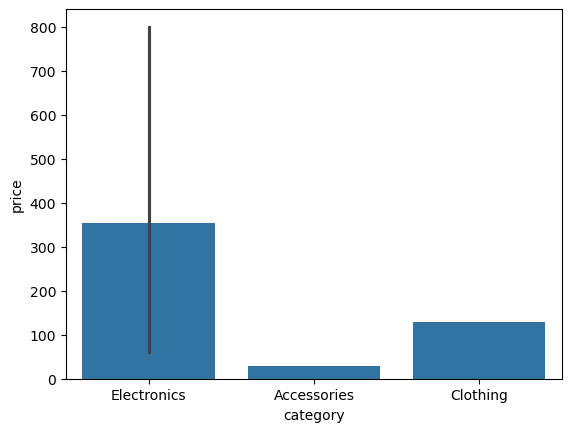

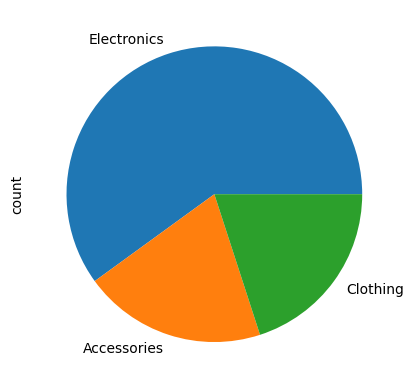

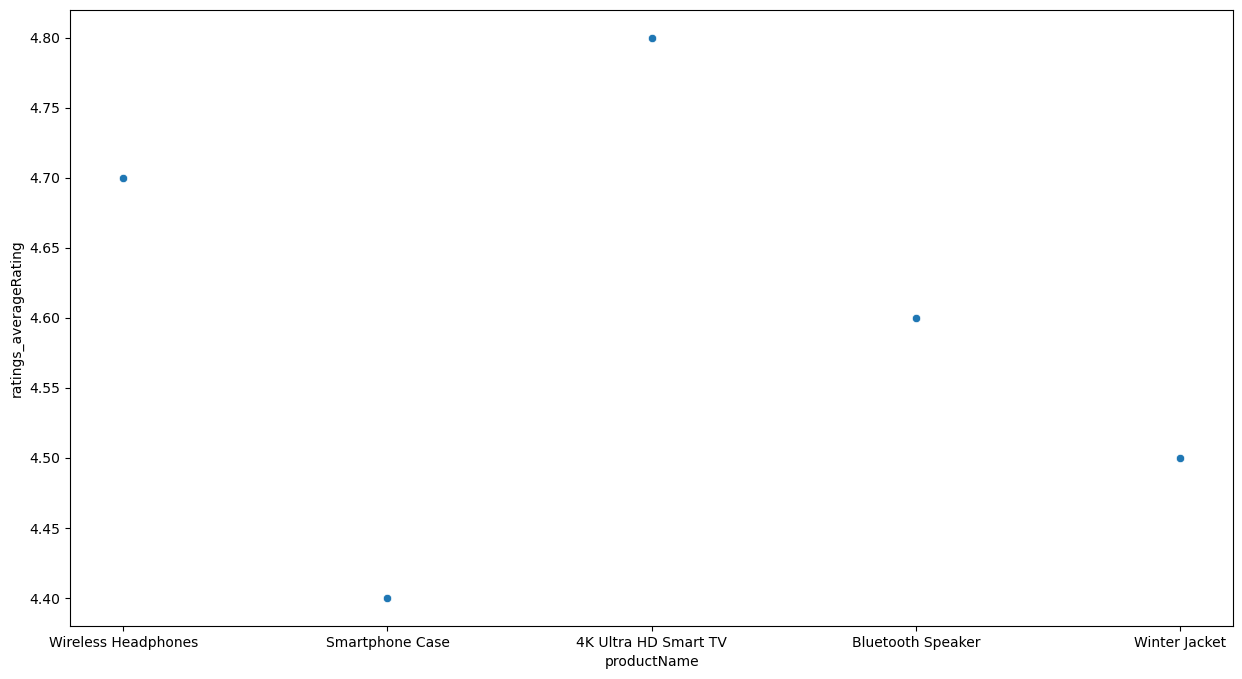

In [31]:
# Bar plot: Compare price by category
sns.barplot(x='category', y='price', data=df_products)
plt.show()

# Pie chart: Product category distribution
df_products['category'].value_counts().plot.pie()
plt.show()

# Scatter plot: Price vs. average rating
plt.figure(figsize = (15,8) )
sns.scatterplot(x='productName', y='ratings_averageRating', data=df_products)
plt.show()
